In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing

In [2]:
bank=pd.read_csv("C:/Users/Singh/Downloads/bankchurn.csv")

In [3]:
bank

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
bank.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
print(bank.dtypes)
bank.columns

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:xlabel='Exited', ylabel='count'>

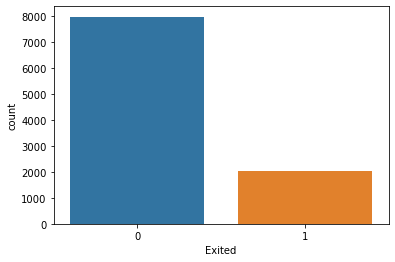

In [6]:
sns.countplot(x=bank["Exited"])  

In [7]:
bank['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
#Most of the people are prone to leave the bank

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

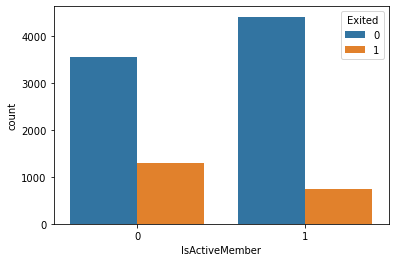

In [9]:
sns.countplot(data=bank, x='IsActiveMember', hue="Exited")

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

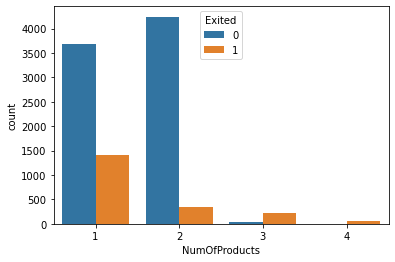

In [10]:
sns.countplot(data=bank, x='NumOfProducts', hue="Exited")

<AxesSubplot:xlabel='Tenure', ylabel='count'>

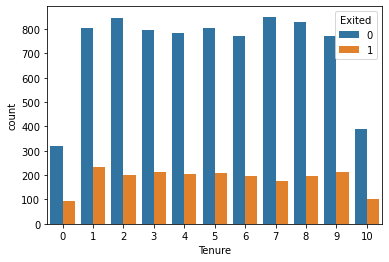

In [11]:
sns.countplot(data=bank, x='Tenure', hue="Exited")

<AxesSubplot:xlabel='Gender', ylabel='count'>

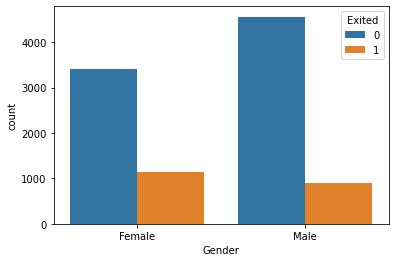

In [12]:
sns.countplot(data=bank, x='Gender', hue="Exited")

In [13]:
#The customer those who are not active are more likely to live the bank.

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

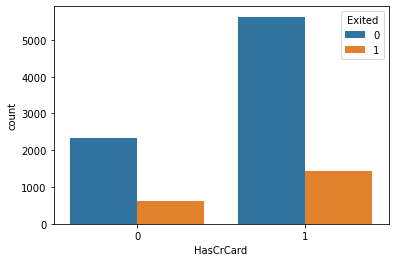

In [14]:
sns.countplot(data=bank, x='HasCrCard', hue="Exited")

In [15]:
#customer those are having a credit card are more likely to leave the bank.

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

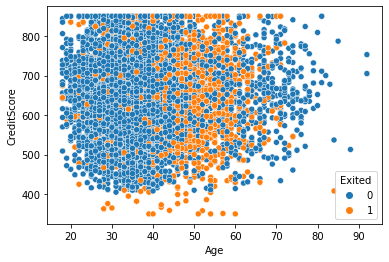

In [16]:
sns.scatterplot(data=bank, x="Age", y="CreditScore", hue="Exited")

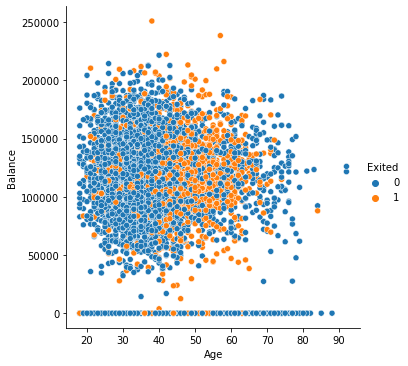

In [17]:
sns.relplot(data=bank, x="Age",y="Balance", hue="Exited")

In [18]:
churn=bank[(bank.Exited==1)]

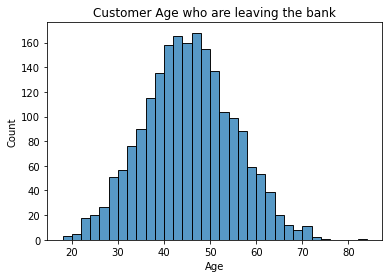

In [19]:
sns.histplot(data=churn, x="Age")
plt.title('Customer Age who are leaving the bank');

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

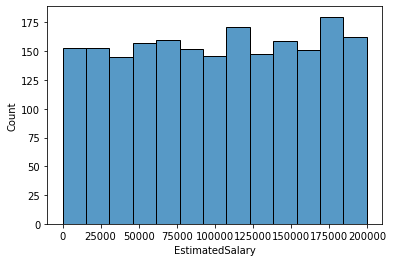

In [20]:
sns.histplot(data=churn,x='EstimatedSalary')

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

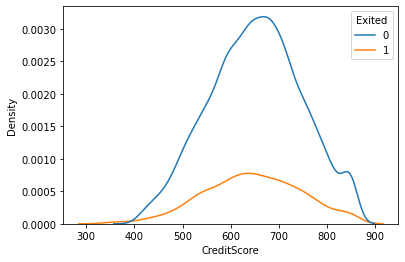

In [21]:
sns.kdeplot(data=bank,x="CreditScore",hue="Exited")

In [22]:
bank.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
bank['Gender']=bank['Gender'].astype('category')

In [24]:
label_encoder = preprocessing.LabelEncoder()
bank['Gender']= label_encoder.fit_transform(bank['Gender'])



In [25]:
bank.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [26]:
bank=bank.drop(['CustomerId', 'Surname','Geography'],axis=1)

In [27]:
X=bank.drop(['Exited'],axis=1)
Y=bank['Exited']

In [28]:
feature=X.columns

In [29]:
from sklearn.feature_selection import f_classif as fs
fscore,pvalue=fs(X,Y)

In [30]:
df=pd.DataFrame({'feature':feature,
                'score':fscore,
                'pvalue':pvalue})

In [31]:
df.sort_values('score',ascending=False)

,feature,score,pvalue
2,Age,886.063275,1.239931e-186
7,IsActiveMember,249.800794,1.348269e-55
4,Balance,142.473832,1.275563e-32
1,Gender,114.727989,1.258505e-26
5,NumOfProducts,22.915223,1.717333e-06
0,CreditScore,7.344522,6.738214e-03
3,Tenure,1.960164,1.615268e-01
8,EstimatedSalary,1.463262,2.264404e-01
6,HasCrCard,0.509401,4.754149e-01


In [32]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 

In [33]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [34]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()  
scaled= sc.fit_transform(X)  

<AxesSubplot:>

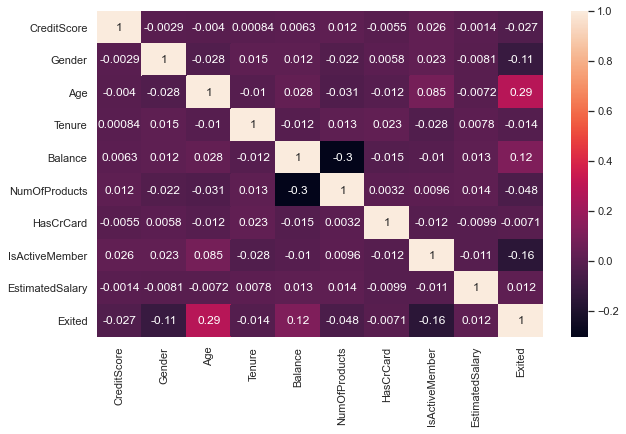

In [35]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.heatmap(bank.corr(),annot=True)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors


In [37]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [38]:
from sklearn.model_selection import train_test_split
def model(train,test):
    X_train,X_test,Y_train,Y_test=train_test_split(train,test,test_size=0.2,random_state=45)
    models1 = []
    models1.append(('LR', LogisticRegression()))
    models1.append(('NB', GaussianNB()))
    models1.append(("ADA", AdaBoostClassifier()))
    models1.append(('CART', DecisionTreeClassifier()))
    models1.append(('RF', RandomForestClassifier()))
    results1=[]
    names1=[]
    for name, model in models1:
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        accuracy = f1_score(Y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)


In [39]:
print('\nfor 20:80 ratio\n')
model(0.2,X,Y)
print('\nfor 30:70 ratio\n')
model(0.3,X,Y)
print('\nfor 40:60 ratio\n')
model(0.4,X,Y)


for 20:80 ratio

LR: (0.106838)
NB: (0.142857)
ADA: (0.555882)
CART: (0.481700)
RF: (0.553846)

for 30:70 ratio

LR: (0.100430)
NB: (0.153020)
ADA: (0.522358)
CART: (0.473101)
RF: (0.539979)

for 40:60 ratio

LR: (0.095847)
NB: (0.125888)
ADA: (0.536982)
CART: (0.494200)
RF: (0.541353)


In [40]:
#Feature Selection:-

In [41]:
X2=bank[['Age','IsActiveMember','Balance','Gender','CreditScore','NumOfProducts']]
Y2=bank['Exited']

In [42]:
print('\nfor 20:80 ratio\n')
model(0.2,X2,Y2)
print('\nfor 30:70 ratio\n')
model(0.3,X2,Y2)
print('\nfor 40:60 ratio\n')
model(0.4,X2,Y2)


for 20:80 ratio

LR: (0.102345)
NB: (0.134921)
ADA: (0.549777)
CART: (0.494090)
RF: (0.555556)

for 30:70 ratio

LR: (0.089209)
NB: (0.145161)
ADA: (0.531027)
CART: (0.476190)
RF: (0.561841)

for 40:60 ratio

LR: (0.087513)
NB: (0.121951)
ADA: (0.533234)
CART: (0.490323)
RF: (0.562278)


In [43]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=3,random_state=None,shuffle=False)
# Modeling step Test differents algorithms 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(DecisionTreeClassifier())
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X,Y, scoring = "f1", cv = kfold, n_jobs=4))
cv_means = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"Algorithm":["LogisticRegression","Naivebayes","RandomForest","AdaBOOST","DecisionTree"]})
print(cv_res)

   CrossValMeans           Algorithm
0       0.099739  LogisticRegression
1       0.121861          Naivebayes
2       0.538684        RandomForest
3       0.556242            AdaBOOST
4       0.465307        DecisionTree


In [44]:
#Plotting the roc curve

In [45]:
### Since the 80:20 is giving the more accuracy result

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X2,Y2,test_size=0.2,random_state=10)

In [47]:
lr=LogisticRegression(random_state = 10)
nb=GaussianNB()
ada=AdaBoostClassifier(random_state = 10)
cart=DecisionTreeClassifier(random_state = 10)
rf=RandomForestClassifier(random_state = 10)

In [48]:
lr.fit(X_train, Y_train)
nb.fit(X_train, Y_train)
ada.fit(X_train, Y_train)
cart.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=10)

In [49]:
Y_pred_lr = lr.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_ada = ada.predict(X_test)
Y_pred_cart = cart.predict(X_test)
Y_pred_rf = rf.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
def confusionmatrix(test,pred):
    print(confusion_matrix(test,pred))
    tn, fp, fn, tp = confusion_matrix(test,pred).ravel()
    print(tn, fp, fn, tp)
    true_prediction=tp+tn
    print("The cases which are predicted corrected is",true_prediction)

In [51]:
#logistic
confusionmatrix(Y_test,Y_pred_lr)

[[1543   35]
 [ 404   18]]
1543 35 404 18
The cases which are predicted corrected is 1561


In [52]:
#Naive bayes
confusionmatrix(Y_test,Y_pred_nb)

[[1531   47]
 [ 398   24]]
1531 47 398 24
The cases which are predicted corrected is 1555


In [53]:
#ADAboost
confusionmatrix(Y_test,Y_pred_ada)

[[1503   75]
 [ 233  189]]
1503 75 233 189
The cases which are predicted corrected is 1692


In [54]:
#cart
confusionmatrix(Y_test,Y_pred_cart)

[[1363  215]
 [ 229  193]]
1363 215 229 193
The cases which are predicted corrected is 1556


In [55]:
#rf
confusionmatrix(Y_test,Y_pred_rf)

[[1501   77]
 [ 224  198]]
1501 77 224 198
The cases which are predicted corrected is 1699


In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [57]:
#ROC_AUC curve
def roc_auc(pred):
    fpr, tpr, thresholds = roc_curve(Y_test,pred)
    auc = roc_auc_score(Y_test,pred)
    print('AUC: %.3f' % auc)

In [58]:
roc_auc(Y_pred_lr)
roc_auc(Y_pred_nb)
roc_auc(Y_pred_ada)
roc_auc(Y_pred_rf)
roc_auc(Y_pred_cart)


AUC: 0.510
AUC: 0.514
AUC: 0.700
AUC: 0.710
AUC: 0.661


In [65]:
from sklearn.metrics import roc_curve

pred_lr = lr.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_lr[:,1], pos_label=1)
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_nb = nb.predict_proba(X_test)
fpr2, tpr2, threshold2 = roc_curve(Y_test, pred_nb[:,1], pos_label=1)

pred_cart = cart.predict_proba(X_test)
fpr3, tpr3, threshold3 = roc_curve(Y_test, pred_cart[:,1], pos_label=1)

pred_ada = ada.predict_proba(X_test)
fpr4, tpr4, threshold4 = roc_curve(Y_test,pred_ada[:,1], pos_label=1)

pred_rf = rf.predict_proba(X_test)
fpr5, tpr5, threshold5 = roc_curve(Y_test,pred_rf[:,1], pos_label=1)


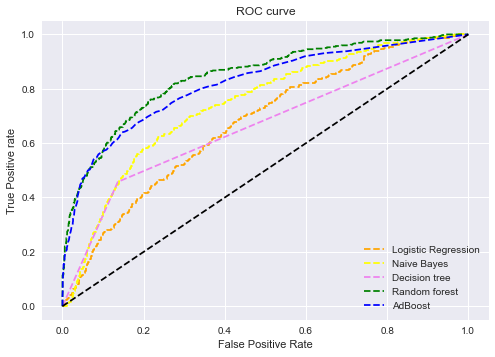

In [67]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='violet', label='Decision tree')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='Random forest')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='AdBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [68]:
from sklearn.metrics import classification_report

In [71]:
print('Classification_report :\n',classification_report(Y_test,Y_pred_rf))

Classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1578
           1       0.72      0.47      0.57       422

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

